In [4]:
#importing libraries
import pandas as pd
import os
import utils
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import itertools
import ast

In [5]:
#setting pandas to display all columns
pd.set_option('display.max_columns', None)

In [6]:
plt.rc('figure', figsize=(12, 8))

In [7]:
df_all = pd.read_csv('echo_track.csv')
df_all.loc[:,'track_genres_all'] = df_all.loc[:,'track_genres_all'].map(ast.literal_eval)
df_all_copy =  df_all.copy()

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12887 entries, 0 to 12886
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   audio_features_acousticness      12887 non-null  float64
 1   audio_features_danceability      12887 non-null  float64
 2   audio_features_energy            12887 non-null  float64
 3   audio_features_instrumentalness  12887 non-null  float64
 4   audio_features_liveness          12887 non-null  float64
 5   audio_features_speechiness       12887 non-null  float64
 6   audio_features_tempo             12887 non-null  float64
 7   audio_features_valence           12887 non-null  float64
 8   album_comments                   12887 non-null  int64  
 9   album_date_released              12887 non-null  float64
 10  album_engineer                   12887 non-null  int64  
 11  album_favorites                  12887 non-null  int64  
 12  album_id          

In [9]:
df_all.track_genre_top.value_counts()

Rock                   3869
Mixed                  3679
Electronic             2114
Hip-Hop                 880
Folk                    862
Old-Time / Historic     357
Pop                     344
Classical               265
Jazz                    217
International           133
Instrumental             84
Blues                    66
Experimental             17
Name: track_genre_top, dtype: int64

<AxesSubplot:xlabel='count', ylabel='track_genre_top'>

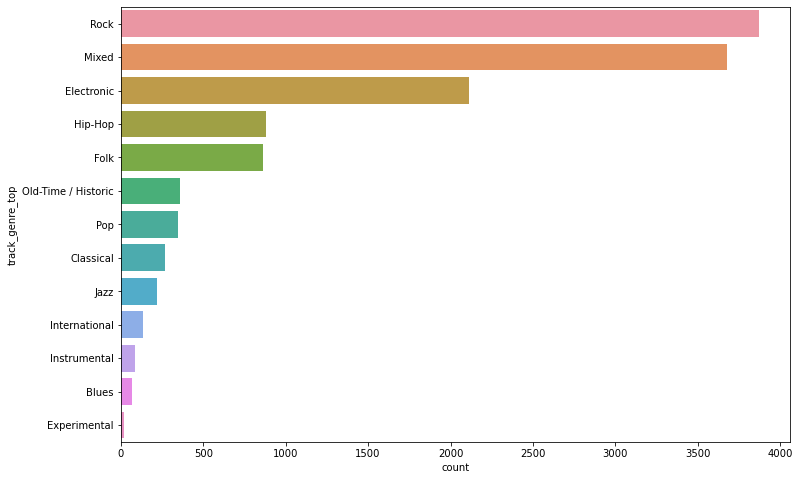

In [10]:
sns.countplot(y = df_all.track_genre_top, order = df_all.track_genre_top.value_counts().keys() )

In [11]:
genres = pd.read_csv('data/fma_metadata/genres.csv')

In [12]:
genres.sort_values('#tracks', ascending = False)[:10]

genre_id  #tracks  parent         title  top_level
31         38    38154       0  Experimental         38
14         15    34413       0    Electronic         15
11         12    32923       0          Rock         12
162      1235    14938       0  Instrumental       1235
9          10    13845       0           Pop         10
16         17    12706       0          Folk         17
22         25     9261      12          Punk         12
0           1     8693      38   Avant-Garde         38
20         21     8389       0       Hip-Hop         21
27         32     7268      38         Noise         38

<AxesSubplot:xlabel='#tracks', ylabel='title'>

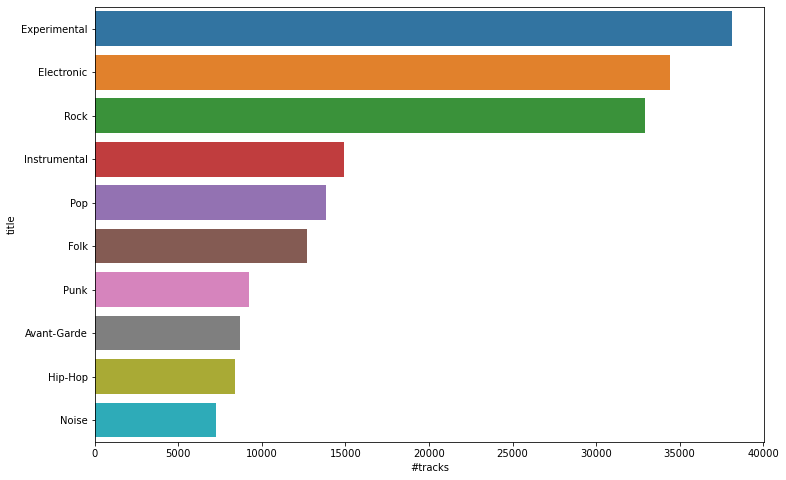

In [13]:
sns.barplot(data = genres.sort_values('#tracks', ascending = False)[:10], x = '#tracks', y = 'title')

In [14]:
genres.loc[(genres.title == 'Rock')|(genres.title == 'Pop')|(genres.title == 'Old-Time / Historic')]

genre_id  #tracks  parent                title  top_level
7          8      868       0  Old-Time / Historic          8
9         10    13845       0                  Pop         10
11        12    32923       0                 Rock         12

In [15]:
df_genres_top = genres.loc[genres.parent == 0]

In [16]:
df_genres_top

genre_id  #tracks  parent                title  top_level
1           2     5271       0        International          2
2           3     1752       0                Blues          3
3           4     4126       0                 Jazz          4
4           5     4106       0            Classical          5
7           8      868       0  Old-Time / Historic          8
8           9     1987       0              Country          9
9          10    13845       0                  Pop         10
11         12    32923       0                 Rock         12
12         13      730       0       Easy Listening         13
13         14     1499       0             Soul-RnB         14
14         15    34413       0           Electronic         15
16         17    12706       0                 Folk         17
19         20     1876       0               Spoken         20
20         21     8389       0              Hip-Hop         21
31         38    38154       0         Experimental         38
162      1235    14938       0         Instrumental       1235

In [51]:
l = df_all.track_genres_all.to_list()

In [56]:
for i in df_genres_top.index:
    df_all.loc[:,f"is_{df_genres_top.loc[i,'title']}"] = [1 if df_genres_top.loc[i,'top_level'] in _ else 0 for _ in l]

In [57]:
(df_all.iloc[:,len(list(df_all))-16:] == 1).sum().sort_values(ascending = False)

is_Rock                   4914
is_Electronic             3370
is_Folk                   1371
is_Pop                    1367
is_Hip-Hop                1333
is_International           660
is_Jazz                    491
is_Classical               459
is_Old-Time / Historic     406
is_Experimental            401
is_Instrumental            244
is_Country                 177
is_Blues                   144
is_Soul-RnB                136
is_Easy Listening           71
is_Spoken                   16
dtype: int64

In [58]:
x = pd.DataFrame((df_all.iloc[:,len(list(df_all))-16:] == 1).sum().sort_values(ascending = False))

<AxesSubplot:xlabel='0'>

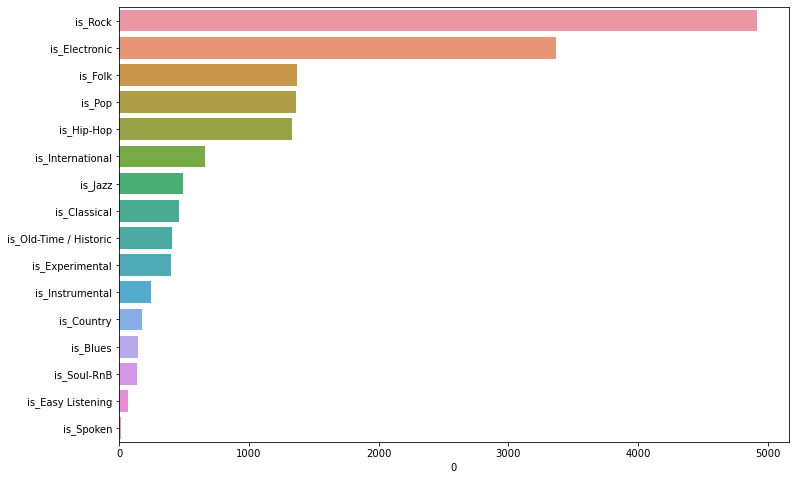

In [59]:
sns.barplot(data = x, x = 0, y = x.index)

### Check correlation

<AxesSubplot:>

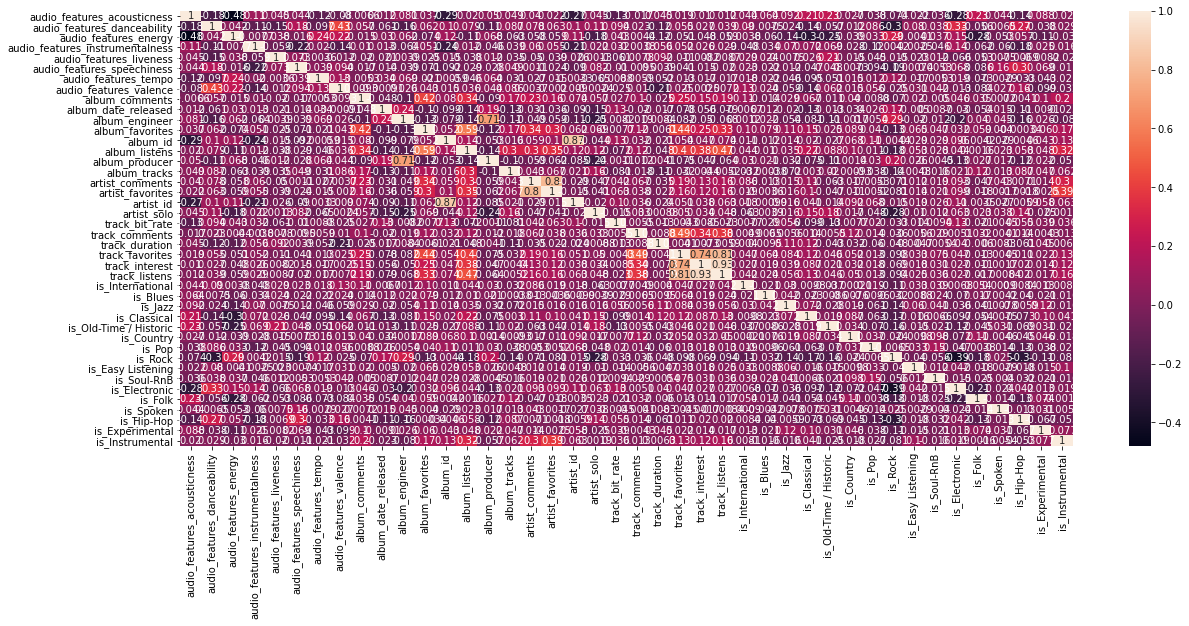

In [60]:
#linear
plt.subplots(figsize=(20,8))
sns.heatmap(df_all.loc[:,list(df_all.select_dtypes(exclude=['object']))].corr(), annot = True)

<AxesSubplot:>

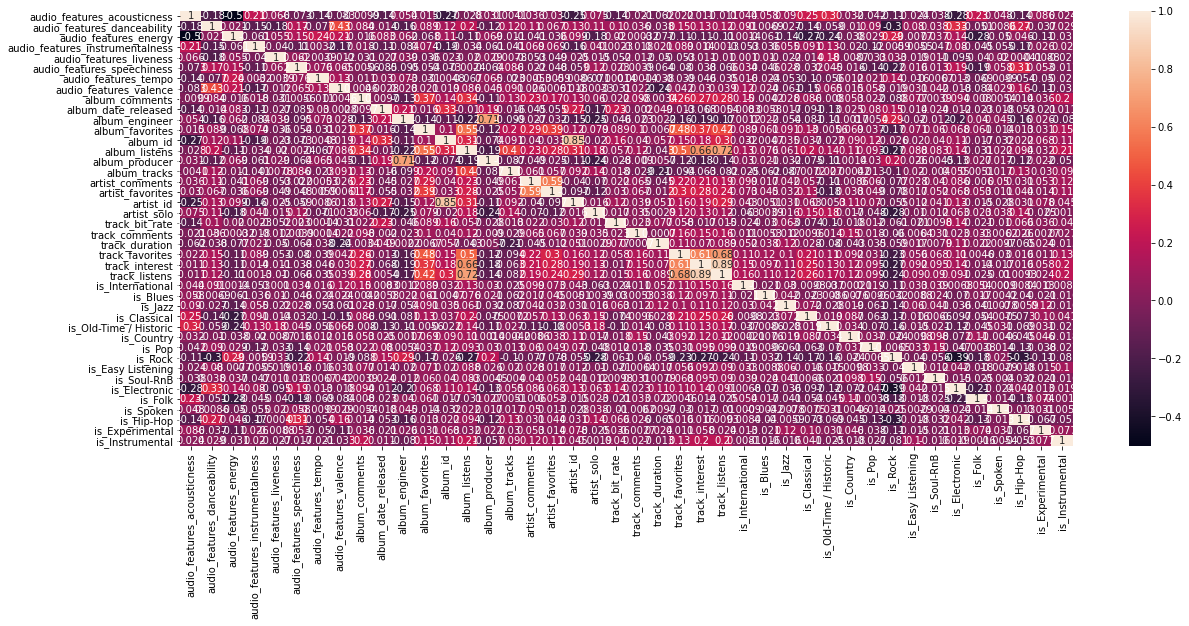

In [61]:
#non linear
plt.subplots(figsize=(20,8))
sns.heatmap(df_all.loc[:,list(df_all.select_dtypes(exclude=['object']))].corr(method = 'spearman'), annot = True)

In [62]:
#dropping redundant variables
df_all = df_all.drop(columns = ['track_comments', 'track_interest', 'track_favorites',
                        'album_id', 'album_title',
                        'artist_comments',
                        'album_comments', 'album_listens', 'album_favorites',
                        'album_engineer'])

<AxesSubplot:>

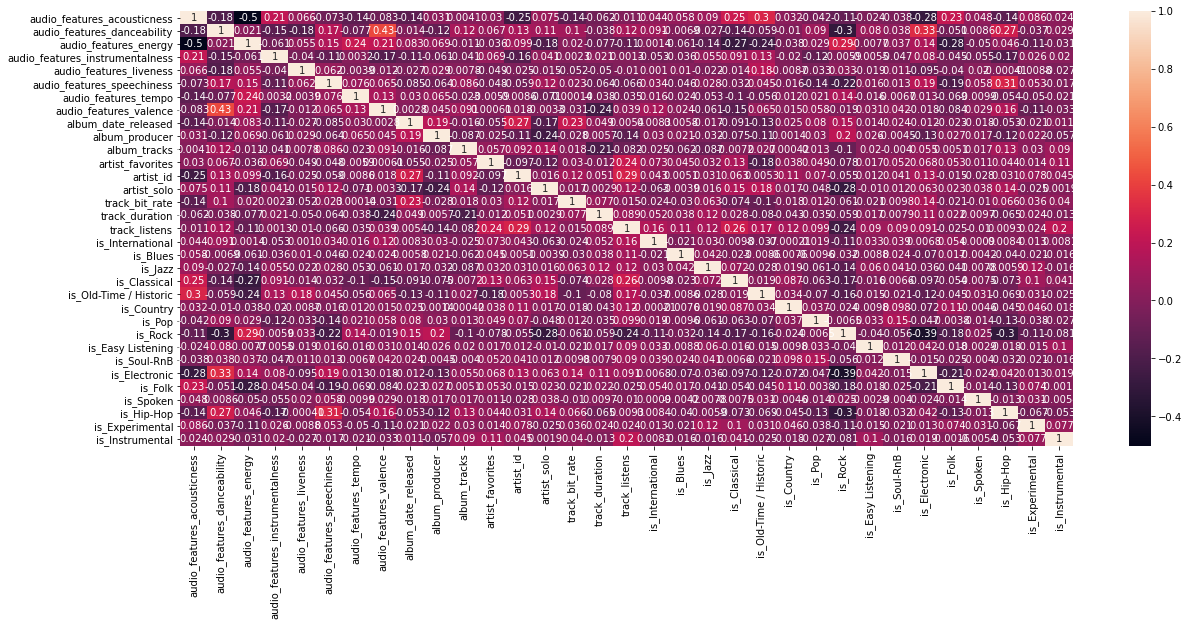

In [63]:
#non linear cleaned
plt.subplots(figsize=(20,8))
sns.heatmap(df_all.loc[:,list(df_all.select_dtypes(exclude=['object']))].corr(method = 'spearman'), annot = True)

In [64]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 12886
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   audio_features_acousticness      11600 non-null  float64
 1   audio_features_danceability      11600 non-null  float64
 2   audio_features_energy            11600 non-null  float64
 3   audio_features_instrumentalness  11600 non-null  float64
 4   audio_features_liveness          11600 non-null  float64
 5   audio_features_speechiness       11600 non-null  float64
 6   audio_features_tempo             11600 non-null  float64
 7   audio_features_valence           11600 non-null  float64
 8   album_date_released              11600 non-null  float64
 9   album_producer                   11600 non-null  int64  
 10  album_tracks                     11600 non-null  int64  
 11  album_type                       11600 non-null  object 
 12  artist_favorites  

In [65]:
list(df_all.iloc[:,:8])

['audio_features_acousticness',
 'audio_features_danceability',
 'audio_features_energy',
 'audio_features_instrumentalness',
 'audio_features_liveness',
 'audio_features_speechiness',
 'audio_features_tempo',
 'audio_features_valence']

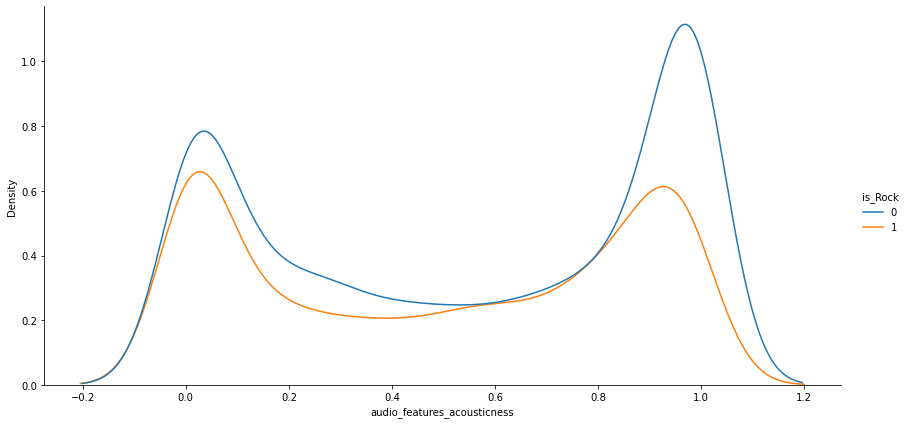

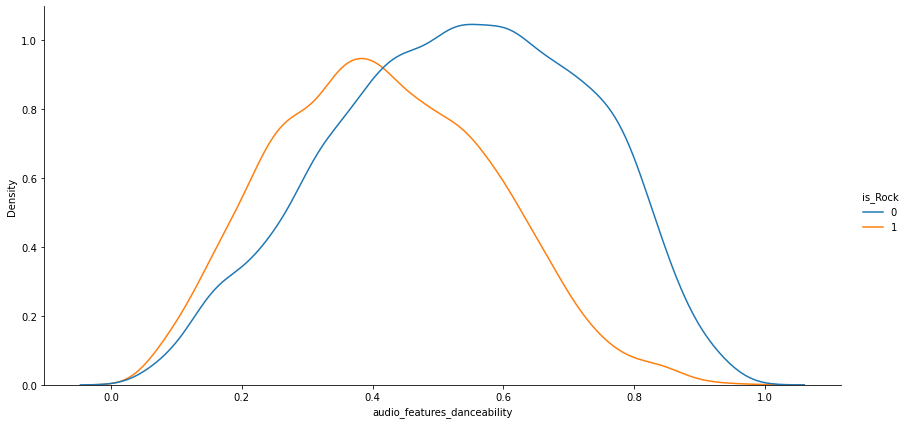

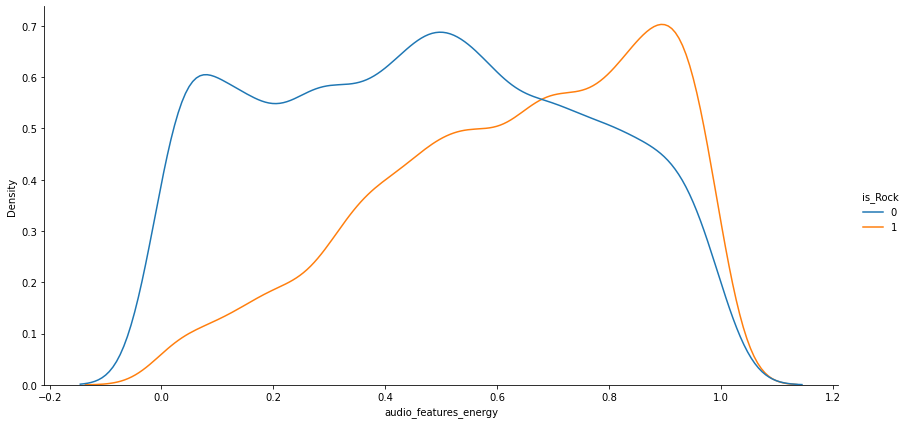

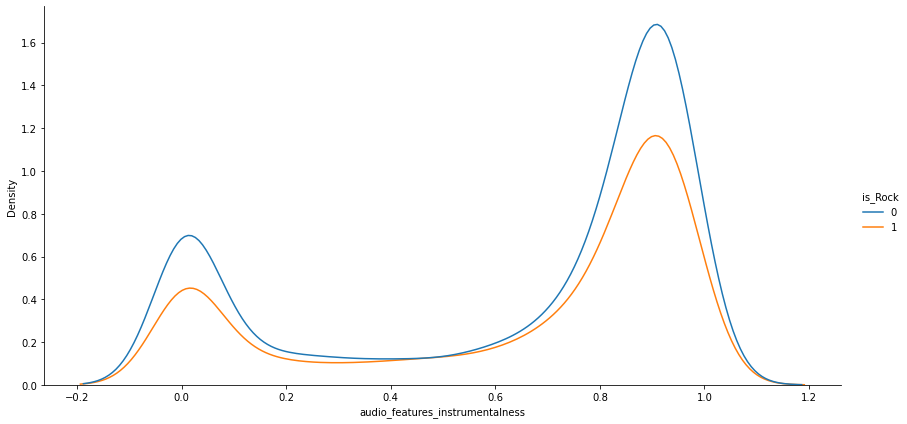

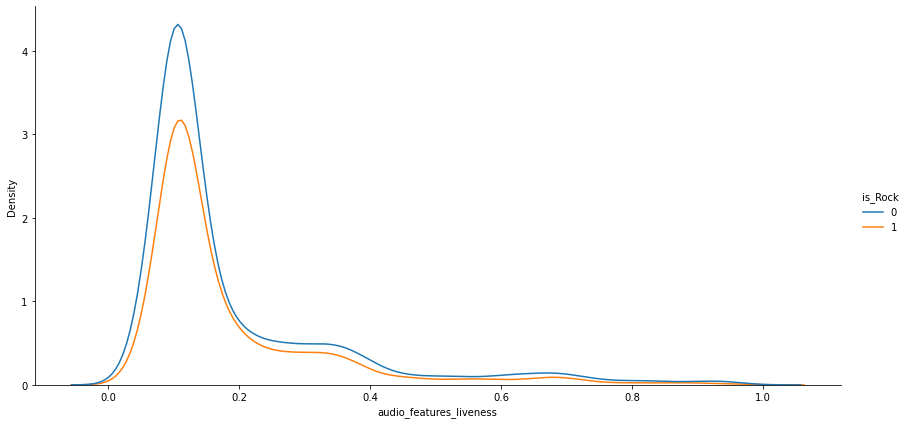

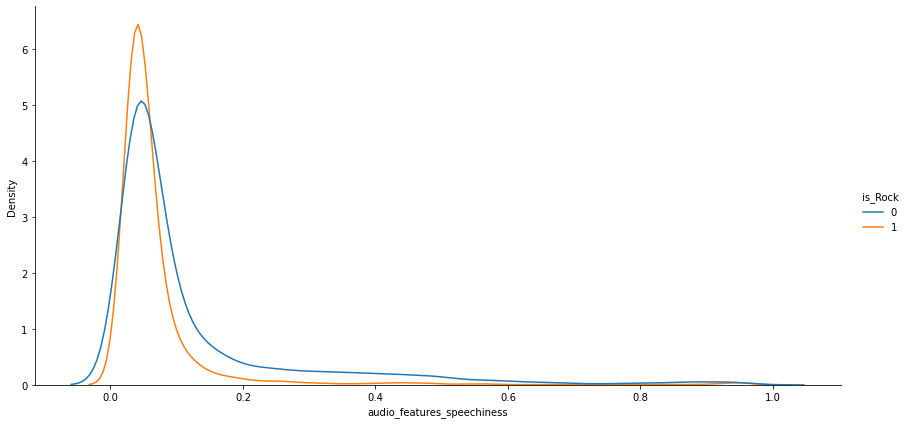

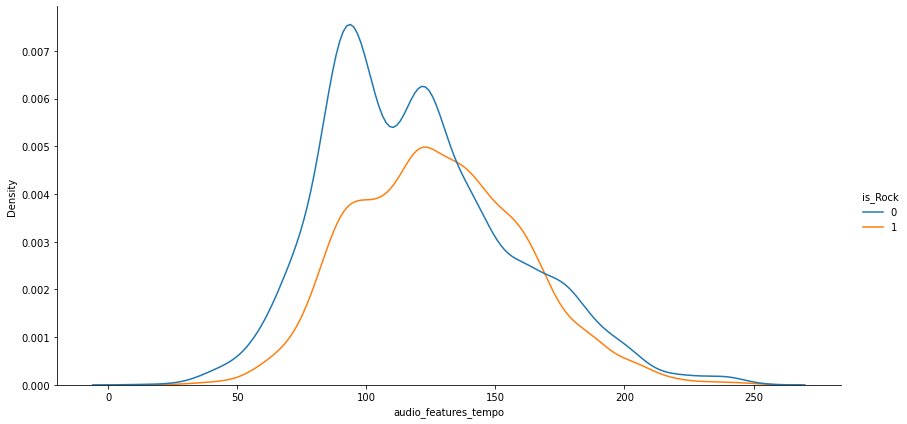

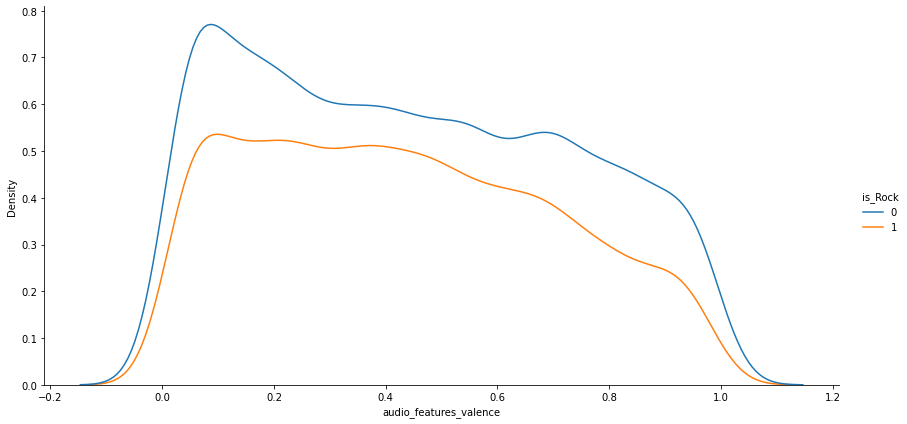

In [66]:
for i in list(df_all.iloc[:,:8]):
    sns.displot(data = df_all,x = i,kind='kde', hue= 'is_Rock', height = 6, aspect = 2)

### Data Encoding

In [67]:
df = df_all.copy()

In [68]:
class_name = "is_Rock"

In [69]:
#droppint rows not relevant for classification
df.drop(columns = ['artist_tags', 'set_split', 'set_subset', 'track_genres', 'track_genres_all', 'track_genre_top', 'artist_id', 'album_date_released'], inplace = True)

In [70]:
tl = [_ for _ in list(df) if 'is_' in _]
tl.remove(class_name)
df.drop(columns = tl,inplace = True)

In [71]:
df

audio_features_acousticness  audio_features_danceability  \
0                         0.416675                     0.675894   
1                         0.374408                     0.528643   
2                         0.043567                     0.745566   
3                         0.951670                     0.658179   
4                         0.452217                     0.513238   
...                            ...                          ...   
12882                     0.007592                     0.790364   
12883                     0.041498                     0.843077   
12884                     0.000124                     0.609686   
12885                     0.327576                     0.574426   
12886                     0.993606                     0.499339   

       audio_features_energy  audio_features_instrumentalness  \
0                   0.634476                         0.010628   
1                   0.817461                         0.001851   
2                   0.701470                         0.000697   
3                   0.924525                         0.965427   
4                   0.560410                         0.019443   
...                      ...                              ...   
12882               0.719288                         0.853114   
12883               0.536496                         0.865151   
12884               0.895136                         0.846624   
12885               0.548327                         0.452867   
12886               0.050622                         0.945677   

       audio_features_liveness  audio_features_speechiness  \
0                     0.177647                    0.159310   
1                     0.105880                    0.461818   
2                     0.373143                    0.124595   
3                     0.115474                    0.032985   
4                     0.096567                    0.525519   
...                        ...                         ...   
12882                 0.720715                    0.082550   
12883                 0.547949                    0.074001   
12884                 0.632903                    0.051517   
12885                 0.075928                    0.033388   
12886                 0.095965                    0.065189   

       audio_features_tempo  audio_features_valence  album_producer  \
0                   165.922                0.576661               0   
1                   126.957                0.269240               0   
2                   100.260                0.621661               0   
3                   111.562                0.963590               0   
4                   114.290                0.894072               0   
...                     ...                     ...             ...   
12882               141.332                0.890461               1   
12883               101.975                0.476845               1   
12884               129.996                0.496667               1   
12885               142.009                0.569274               1   
12886               119.965                0.204652               0   

       album_tracks album_type  artist_favorites  artist_solo  track_bit_rate  \
0                 7      Album                 9            0           256.0   
1                 7      Album                 9            0           256.0   
2                 7      Album                 9            0           256.0   
3                 2      Album                74            0           192.0   
4                 7      Album                 9            0           256.0   
...             ...        ...               ...          ...             ...   
12882            14      Album                 8            1           320.0   
12883            14      Album                 8            1           320.0   
12884            14      Album                 8            1           320.0   
12885        

In [72]:
dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=', drop_first=True)
dfX.head()

audio_features_acousticness  audio_features_danceability  \
0                     0.416675                     0.675894   
1                     0.374408                     0.528643   
2                     0.043567                     0.745566   
3                     0.951670                     0.658179   
4                     0.452217                     0.513238   

   audio_features_energy  audio_features_instrumentalness  \
0               0.634476                         0.010628   
1               0.817461                         0.001851   
2               0.701470                         0.000697   
3               0.924525                         0.965427   
4               0.560410                         0.019443   

   audio_features_liveness  audio_features_speechiness  audio_features_tempo  \
0                 0.177647                    0.159310               165.922   
1                 0.105880                    0.461818               126.957   
2                 0.373143                    0.124595               100.260   
3                 0.115474                    0.032985               111.562   
4                 0.096567                    0.525519               114.290   

   audio_features_valence  album_producer  album_tracks  artist_favorites  \
0                0.576661               0             7                 9   
1                0.269240               0             7                 9   
2                0.621661               0             7                 9   
3                0.963590               0             2                74   
4                0.894072               0             7                 9   

   artist_solo  track_bit_rate  track_duration  track_listens  \
0            0           256.0             168           1293   
1            0           256.0             237            514   
2            0           256.0             206           1151   
3            0           192.0             161          50135   
4            0           256.0             207            943   

   album_type=Contest  album_type=Live Performance  album_type=Radio Program  \
0                   0                            0                         0   
1                   0                            0                         0   
2                   0                            0                         0   
3                   0                            0                         0   
4                   0                            0                         0   

   album_type=Single Tracks  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0

In [73]:
'''
#encoding track_genre_top
from sklearn import preprocessing
target_le = preprocessing.LabelEncoder()
df[class_name] = target_le.fit_transform(df[class_name])
'''

'\n#encoding track_genre_top\nfrom sklearn import preprocessing\ntarget_le = preprocessing.LabelEncoder()\ndf[class_name] = target_le.fit_transform(df[class_name])\n'

In [74]:
dfY = df[class_name]
dfY.head()

0    0
1    0
2    0
3    0
4    0
Name: is_Rock, dtype: int64

In [75]:
df = pd.concat([dfX, dfY], axis = 1)

In [76]:
df

audio_features_acousticness  audio_features_danceability  \
0                         0.416675                     0.675894   
1                         0.374408                     0.528643   
2                         0.043567                     0.745566   
3                         0.951670                     0.658179   
4                         0.452217                     0.513238   
...                            ...                          ...   
12882                     0.007592                     0.790364   
12883                     0.041498                     0.843077   
12884                     0.000124                     0.609686   
12885                     0.327576                     0.574426   
12886                     0.993606                     0.499339   

       audio_features_energy  audio_features_instrumentalness  \
0                   0.634476                         0.010628   
1                   0.817461                         0.001851   
2                   0.701470                         0.000697   
3                   0.924525                         0.965427   
4                   0.560410                         0.019443   
...                      ...                              ...   
12882               0.719288                         0.853114   
12883               0.536496                         0.865151   
12884               0.895136                         0.846624   
12885               0.548327                         0.452867   
12886               0.050622                         0.945677   

       audio_features_liveness  audio_features_speechiness  \
0                     0.177647                    0.159310   
1                     0.105880                    0.461818   
2                     0.373143                    0.124595   
3                     0.115474                    0.032985   
4                     0.096567                    0.525519   
...                        ...                         ...   
12882                 0.720715                    0.082550   
12883                 0.547949                    0.074001   
12884                 0.632903                    0.051517   
12885                 0.075928                    0.033388   
12886                 0.095965                    0.065189   

       audio_features_tempo  audio_features_valence  album_producer  \
0                   165.922                0.576661               0   
1                   126.957                0.269240               0   
2                   100.260                0.621661               0   
3                   111.562                0.963590               0   
4                   114.290                0.894072               0   
...                     ...                     ...             ...   
12882               141.332                0.890461               1   
12883               101.975                0.476845               1   
12884               129.996                0.496667               1   
12885               142.009                0.569274               1   
12886               119.965                0.204652               0   

       album_tracks  artist_favorites  artist_solo  track_bit_rate  \
0                 7                 9            0           256.0   
1                 7                 9            0           256.0   
2                 7                 9            0           256.0   
3                 2                74            0           192.0   
4                 7                 9            0           256.0   
...             ...               ...          ...             ...   
12882            14                 8            1           320.0   
12883            14                 8            1           320.0   
12884            14                 8            1           320.0   
12885            14                 8            1           320.0   
12886             1                81            1   

In [77]:
df_backup = df.copy()

### Split train and test df

In [78]:
test_df = df_all.loc[df_all.set_split  == 'test']
test_df.to_csv('test_df_FMA')

In [79]:
df_all = df_all.loc[df_all.set_split != 'test']

### Feature selection

In [80]:
from sklearn.feature_selection import SelectKBest

In [81]:
df_qual = df[['album_producer','album_type=Contest','album_type=Live Performance','album_type=Radio Program','album_type=Single Tracks','artist_solo']].copy()
df_quant = df[[_ for _ in list(df) if _ not in list(df_qual) and _ != class_name]].copy()

In [82]:
from sklearn.feature_selection import f_classif

In [83]:
X = df_quant
y = df[class_name]

In [84]:
f_classif(X, y)

(array([6.33247479e+01, 1.15987301e+03, 1.05942165e+03, 2.02768879e-01,
        2.64225680e+00, 4.22181751e+02, 1.73773409e+02, 7.03758259e+00,
        2.37813568e+02, 7.57091729e+01, 1.28096236e+01, 2.72657897e+01,
        1.02711007e+02]),
 array([1.91571118e-015, 2.18502271e-242, 1.84288543e-222, 6.52503525e-001,
        1.04082805e-001, 3.54369344e-092, 2.12904272e-039, 7.99254024e-003,
        3.96425959e-053, 3.72906605e-018, 3.46248440e-004, 1.80389721e-007,
        4.88286982e-024]))

In [85]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all').fit(X, y)

In [86]:
fs.scores_

array([6.33247479e+01, 1.15987301e+03, 1.05942165e+03, 2.02768879e-01,
       2.64225680e+00, 4.22181751e+02, 1.73773409e+02, 7.03758259e+00,
       2.37813568e+02, 7.57091729e+01, 1.28096236e+01, 2.72657897e+01,
       1.02711007e+02])

In [87]:
anova_df = pd.DataFrame({'Quantitative variables':list(df_quant) , 'F - values':fs.scores_}).sort_values(by='F - values', ascending=False).reset_index(drop=True)

In [88]:
anova_df

Quantitative variables   F - values
0       audio_features_danceability  1159.873008
1             audio_features_energy  1059.421654
2        audio_features_speechiness   422.181751
3                      album_tracks   237.813568
4              audio_features_tempo   173.773409
5                     track_listens   102.711007
6                  artist_favorites    75.709173
7       audio_features_acousticness    63.324748
8                    track_duration    27.265790
9                    track_bit_rate    12.809624
10           audio_features_valence     7.037583
11          audio_features_liveness     2.642257
12  audio_features_instrumentalness     0.202769

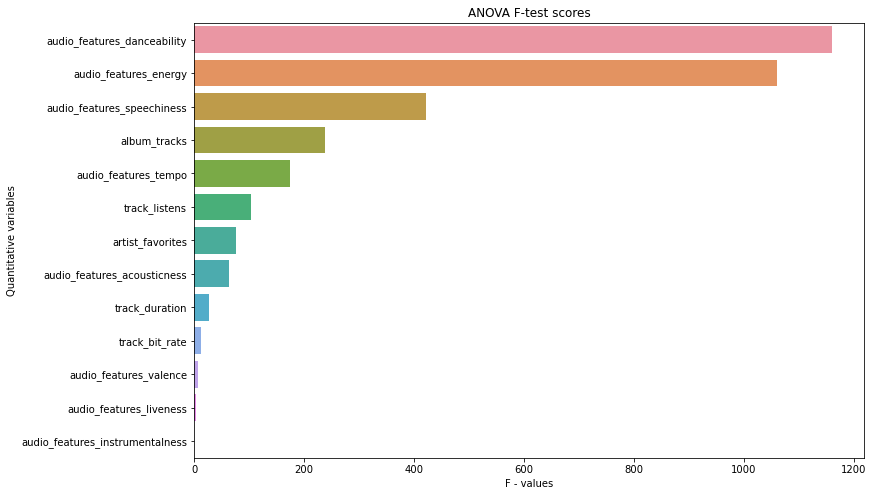

In [89]:
import seaborn as sns
g = sns.barplot(y = anova_df['Quantitative variables'], x = anova_df['F - values'])
g.set_title('ANOVA F-test scores')
plt.show()

Part 2: qualitative (chi_square)

In [90]:
from sklearn.feature_selection import chi2

In [91]:
X = df_qual
y = df[class_name]

In [92]:
X

album_producer  album_type=Contest  album_type=Live Performance  \
0                   0                   0                            0   
1                   0                   0                            0   
2                   0                   0                            0   
3                   0                   0                            0   
4                   0                   0                            0   
...               ...                 ...                          ...   
12882               1                   0                            0   
12883               1                   0                            0   
12884               1                   0                            0   
12885               1                   0                            0   
12886               0                   0                            0   

       album_type=Radio Program  album_type=Single Tracks  artist_solo  
0                             0                         0            0  
1                             0                         0            0  
2                             0                         0            0  
3                             0                         0            0  
4                             0                         0            0  
...                         ...                       ...          ...  
12882                         0                         0            1  
12883                         0                         0            1  
12884                         0                         0            1  
12885                         0                         0            1  
12886                         0                         0            1  

[11600 rows x 6 columns]

In [93]:
chi2(X, y)

(array([351.62256869,   9.55459168, 201.3454021 , 539.72624801,
          3.30087586, 461.59505707]),
 array([1.87847141e-078, 1.99449874e-003, 1.06228205e-045, 2.16265231e-119,
        6.92429535e-002, 2.16162619e-102]))

In [94]:
fc = SelectKBest(chi2, k='all').fit(X, y)

In [95]:
chi2_df = pd.DataFrame({'Qualitative variables':list(df_qual) , 'Chi-squared statistics':fc.scores_}).sort_values(by='Chi-squared statistics', ascending=False).reset_index(drop=True)

In [96]:
chi2_df

Qualitative variables  Chi-squared statistics
0     album_type=Radio Program              539.726248
1                  artist_solo              461.595057
2               album_producer              351.622569
3  album_type=Live Performance              201.345402
4           album_type=Contest                9.554592
5     album_type=Single Tracks                3.300876

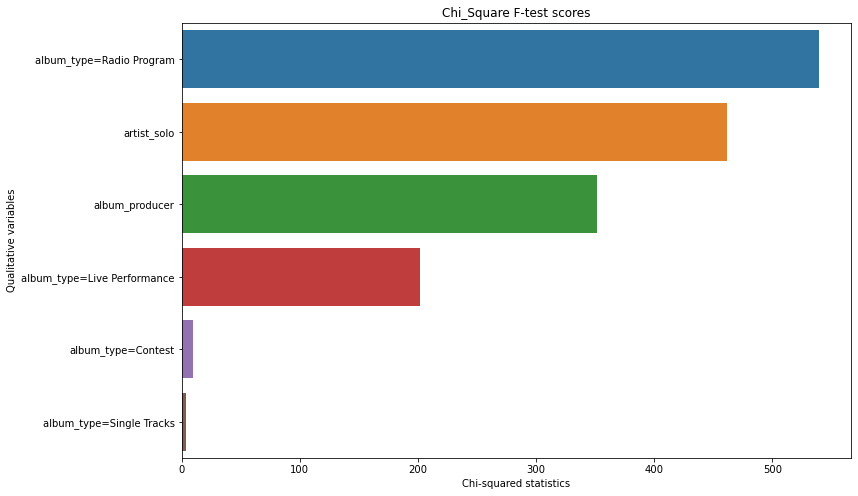

In [97]:
g = sns.barplot(y = chi2_df['Qualitative variables'], x = chi2_df['Chi-squared statistics'])
g.set_title('Chi_Square F-test scores')
plt.show()

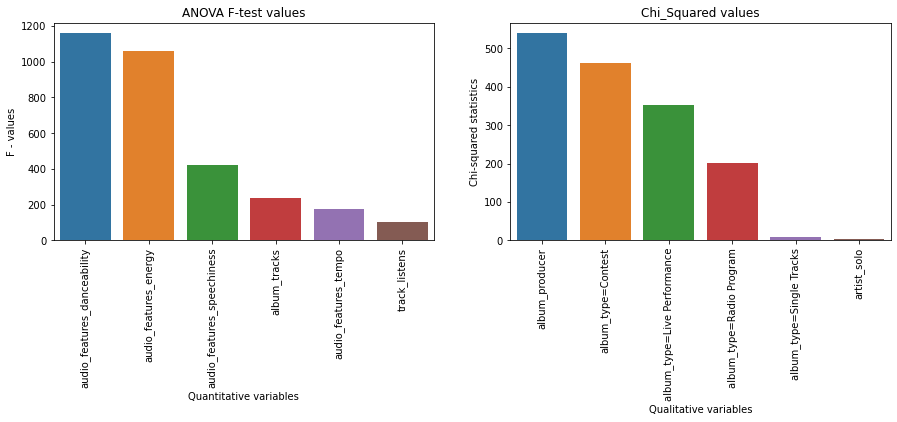

In [98]:
fig, ax = plt.subplots(1,2, figsize =(15,4))
plt.sca(ax[0])
g = sns.barplot(data = anova_df[:6], x = 'Quantitative variables', y = 'F - values')
g.set_xticklabels(labels= list(anova_df[:6]['Quantitative variables']), rotation=90)
g.set_title('ANOVA F-test values')
plt.sca(ax[1])
g = sns.barplot(x = chi2_df['Qualitative variables'], y = chi2_df['Chi-squared statistics'])
g.set_xticklabels(labels= list(df_qual), rotation=90)
g.set_title('Chi_Squared values')
plt.show()

In [99]:
df = df_backup.copy()

In [100]:
attr_selected = list(anova_df['Quantitative variables'][:4]) + list(chi2_df['Qualitative variables'][:3])

In [101]:
attr_selected.append(class_name)

In [102]:
df = df[attr_selected].copy()

In [103]:
df

audio_features_danceability  audio_features_energy  \
0                         0.675894               0.634476   
1                         0.528643               0.817461   
2                         0.745566               0.701470   
3                         0.658179               0.924525   
4                         0.513238               0.560410   
...                            ...                    ...   
12882                     0.790364               0.719288   
12883                     0.843077               0.536496   
12884                     0.609686               0.895136   
12885                     0.574426               0.548327   
12886                     0.499339               0.050622   

       audio_features_speechiness  album_tracks  album_type=Radio Program  \
0                        0.159310             7                         0   
1                        0.461818             7                         0   
2                        0.124595             7                         0   
3                        0.032985             2                         0   
4                        0.525519             7                         0   
...                           ...           ...                       ...   
12882                    0.082550            14                         0   
12883                    0.074001            14                         0   
12884                    0.051517            14                         0   
12885                    0.033388            14                         0   
12886                    0.065189             1                         0   

       artist_solo  album_producer  is_Rock  
0                0               0        0  
1                0               0        0  
2                0               0        0  
3                0               0        0  
4                0               0        0  
...            ...             ...      ...  
12882            1               1        0  
12883            1               1        0  
12884            1               1        0  
12885            1               1        0  
12886            1               0        0  

[11600 rows x 8 columns]

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

### Classification tree

In [1123]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [1124]:
(df[class_name]==0).sum()/len(df)

0.5763793103448276

In [1125]:
#instanciate clf
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2, min_samples_leaf=1)
#induction
clf = clf.fit(X_train, y_train)
#deduction
pred_train = clf.predict(X_train)
pred_validation = clf.predict(X_validation)

In [1126]:
def plot_validation_curve(classifier, parameter, param_range):
    train_scores, test_scores = validation_curve(
                                classifier,
                                X , y , 
                                param_name = parameter, 
                                param_range = param_range, cv = 3)
    train_means = np.mean(train_scores,axis=1)
    test_means = np.mean(test_scores,axis=1)
    plt.plot(param_range, train_means, label="Training score", color="orange")
    plt.plot(param_range, test_means, label="Cross-validation score", color='xkcd:lightish blue')
    plt.title("Validation Curve With Classification Tree")
    plt.xlabel(parameter)
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    #plt.show()

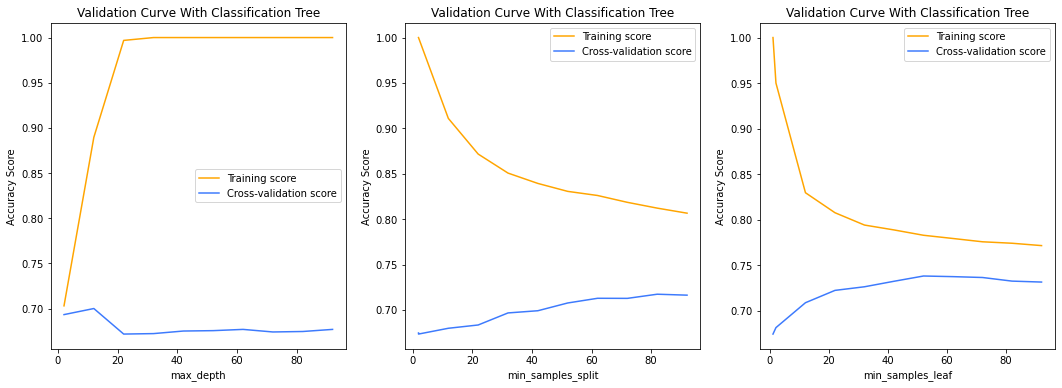

In [1127]:
fig, ax = plt.subplots(1,3, figsize =(18,6))
plt.sca(ax[0])
plot_validation_curve(DecisionTreeClassifier(),'max_depth',([2] + list(np.arange(2, 100,10))))
plt.sca(ax[1])
plot_validation_curve(DecisionTreeClassifier(),'min_samples_split',([2] + list(np.arange(2, 100,10))))
plt.sca(ax[2])
plot_validation_curve(DecisionTreeClassifier(),'min_samples_leaf',([1] + list(np.arange(2, 100,10))))

In [1128]:
print('train acc. : ',accuracy_score(y_train, pred_train))
print('test acc. : ',accuracy_score(y_validation, pred_validation))

train acc. :  0.7374384236453202
test acc. :  0.735632183908046


In [1129]:
scores = cross_val_score(clf, X, y)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7232 (+/- 0.07)
F1-score: 0.7155 (+/- 0.07)


In [1130]:
print('Accuracy %s' % accuracy_score(y_validation, pred_validation))
print('F1-score %s' % f1_score(y_validation, pred_validation, average=None))
print(classification_report(y_validation, pred_validation))
confusion_matrix(y_validation, pred_validation)

Accuracy 0.735632183908046
F1-score [0.77560976 0.67832168]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2006
           1       0.70      0.66      0.68      1474

    accuracy                           0.74      3480
   macro avg       0.73      0.73      0.73      3480
weighted avg       0.73      0.74      0.73      3480



array([[1590,  416],
       [ 504,  970]])

In [1131]:
df

audio_features_danceability  audio_features_energy  \
0                         0.675894               0.634476   
1                         0.528643               0.817461   
2                         0.745566               0.701470   
3                         0.658179               0.924525   
4                         0.513238               0.560410   
...                            ...                    ...   
12882                     0.790364               0.719288   
12883                     0.843077               0.536496   
12884                     0.609686               0.895136   
12885                     0.574426               0.548327   
12886                     0.499339               0.050622   

       audio_features_speechiness  album_tracks  album_type=Radio Program  \
0                        0.159310             7                         0   
1                        0.461818             7                         0   
2                        0.124595             7                         0   
3                        0.032985             2                         0   
4                        0.525519             7                         0   
...                           ...           ...                       ...   
12882                    0.082550            14                         0   
12883                    0.074001            14                         0   
12884                    0.051517            14                         0   
12885                    0.033388            14                         0   
12886                    0.065189             1                         0   

       artist_solo  album_producer  is_Rock  
0                0               0        0  
1                0               0        0  
2                0               0        0  
3                0               0        0  
4                0               0        0  
...            ...             ...      ...  
12882            1               1        0  
12883            1               1        0  
12884            1               1        0  
12885            1               1        0  
12886            1               0        0  

[11600 rows x 8 columns]

In [1132]:
from TheBeast_V5 import BEAST

In [1133]:
b = BEAST.initiate(classifier = DecisionTreeClassifier(), data = df, t_var = class_name, column_range='all')

100%|██████████| 21/21 [00:00<00:00, 114.10it/s]


KeyboardInterrupt: 

Process ForkProcess-152:
Process ForkProcess-153:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/opt/anaconda3/lib/python3.7/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/opt

In [ ]:
b

In [948]:
list(list(b.keys())[0])

['audio_features_danceability',
 'audio_features_energy',
 'audio_features_speechiness',
 'album_type=Radio Program',
 'artist_solo']

In [949]:
attributes = list(list(b.keys())[0])
X = df[attributes].values
y = df[class_name]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [950]:
#instanciate clf
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=9, min_samples_leaf=1)
#induction
clf = clf.fit(X_train, y_train)
#deduction
pred_train = clf.predict(X_train)
pred_validation = clf.predict(X_validation)

In [951]:
print('Train Accuracy %s' % accuracy_score(y_train, pred_train))
print('Train F1-score %s' % f1_score(y_train, pred_train))
print()

print('Test Accuracy %s' % accuracy_score(y_validation, pred_validation))
print('Test F1-score %s' % f1_score(y_validation, pred_validation))
print(classification_report(y_validation, pred_validation))
confusion_matrix(y_validation, pred_validation)

Train Accuracy 0.7374384236453202
Train F1-score 0.6833036244800951

Test Accuracy 0.735632183908046
Test F1-score 0.6783216783216783
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2006
           1       0.70      0.66      0.68      1474

    accuracy                           0.74      3480
   macro avg       0.73      0.73      0.73      3480
weighted avg       0.73      0.74      0.73      3480



array([[1590,  416],
       [ 504,  970]])

In [952]:
scores = cross_val_score(clf, X, y)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, X, y, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7228 (+/- 0.07)
F1-score: 0.7150 (+/- 0.07)


#### Naive bayes

In [1041]:
df

audio_features_danceability  audio_features_energy  \
0                         0.675894               0.634476   
1                         0.528643               0.817461   
2                         0.745566               0.701470   
3                         0.658179               0.924525   
4                         0.513238               0.560410   
...                            ...                    ...   
12882                     0.790364               0.719288   
12883                     0.843077               0.536496   
12884                     0.609686               0.895136   
12885                     0.574426               0.548327   
12886                     0.499339               0.050622   

       audio_features_speechiness  album_date_released  \
0                        0.159310               2008.0   
1                        0.461818               2008.0   
2                        0.124595               2008.0   
3                        0.032985               2008.0   
4                        0.525519               2008.0   
...                           ...                  ...   
12882                    0.082550               2006.0   
12883                    0.074001               2006.0   
12884                    0.051517               2006.0   
12885                    0.033388               2006.0   
12886                    0.065189               2010.0   

       album_type=Radio Program  artist_solo  album_producer  is_Rock  
0                             0            0               0        0  
1                             0            0               0        0  
2                             0            0               0        0  
3                             0            0               0        0  
4                             0            0               0        0  
...                         ...          ...             ...      ...  
12882                         0            1               1        0  
12883                         0            1               1        0  
12884                         0            1               1        0  
12885                         0            1               1        0  
12886                         0            1               0        0  

[11600 rows x 8 columns]

<AxesSubplot:>

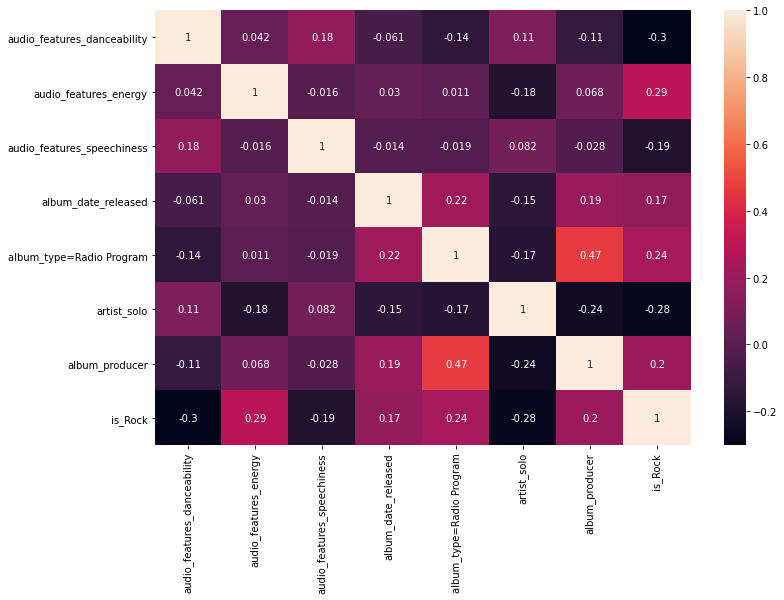

In [1080]:
sns.heatmap(df.corr(), annot = True)

In [1134]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
#GaussianNB -> numerical
#CategoricalNB -> only categorical

In [1135]:
#Gaussian Bayes classifier

In [1153]:
attributes = [c for c in df.columns if c not in ['artist_solo', 'album_type=Radio Program', 'album_producer','album_type=Contest','album_type=Live Performance'] and c != class_name]
X = df[attributes]
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [1154]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1155]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.6798850574712644
F1-score [0.67273796 0.68672666]
              precision    recall  f1-score   support

           0       0.82      0.57      0.67      2006
           1       0.59      0.83      0.69      1474

    accuracy                           0.68      3480
   macro avg       0.70      0.70      0.68      3480
weighted avg       0.72      0.68      0.68      3480



array([[1145,  861],
       [ 253, 1221]])

In [1078]:
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.6974 (+/- 0.07)
F1-score: 0.6939 (+/- 0.07)


In [1059]:
#Multinominal Bayes classifier

In [1060]:
attributes = ['artist_solo', 'album_type=Radio Program', 'album_producer'] #'album_type=Contest','album_type=Live Performance']
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=100, stratify=y)

In [1062]:
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1063]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6468390804597701
F1-score [0.73620949 0.4658844 ]
              precision    recall  f1-score   support

           0       0.65      0.85      0.74      2006
           1       0.65      0.36      0.47      1474

    accuracy                           0.65      3480
   macro avg       0.65      0.61      0.60      3480
weighted avg       0.65      0.65      0.62      3480



In [1064]:
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.6491 (+/- 0.08)
F1-score: 0.6017 (+/- 0.08)


### Logistic regression

In [1214]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [1215]:
attributes[1]

'audio_features_energy'

In [1265]:
selected_columns = attributes # Light, Temperature

X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [1266]:
X.shape

(11600, 7)

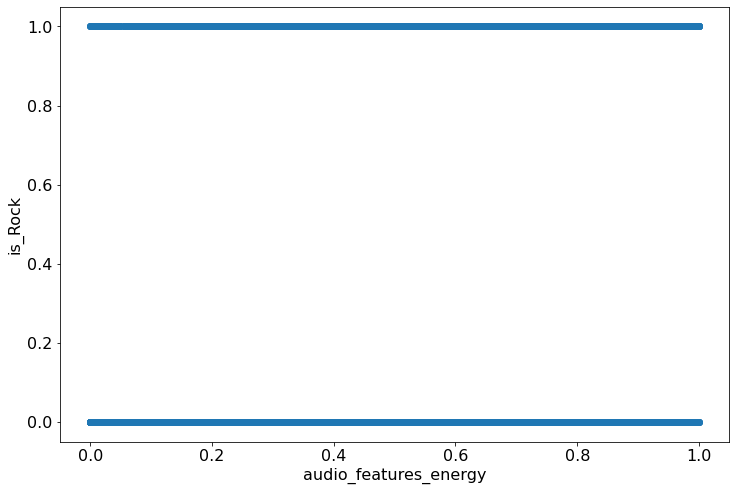

In [1256]:
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel(class_name, fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [1257]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [1267]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [1268]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.746551724137931
F1-score [0.78889421 0.6829619 ]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2006
           1       0.73      0.64      0.68      1474

    accuracy                           0.75      3480
   macro avg       0.74      0.73      0.74      3480
weighted avg       0.75      0.75      0.74      3480



array([[1648,  358],
       [ 524,  950]])

In [1260]:
from scipy.special import expit

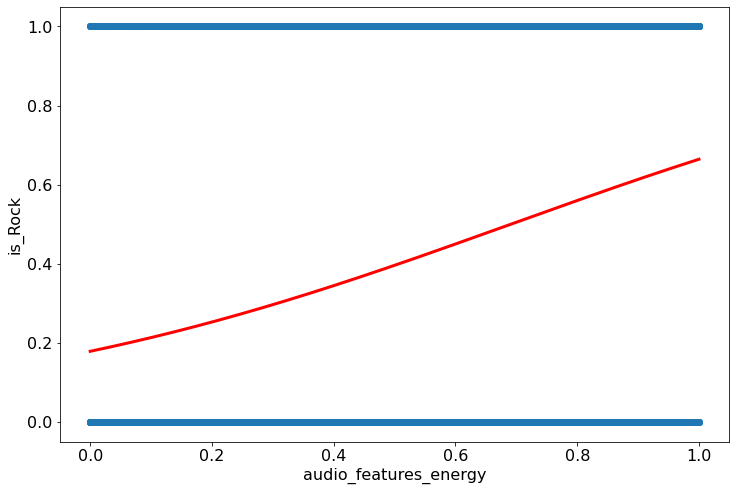

In [1261]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel(class_name, fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [1262]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

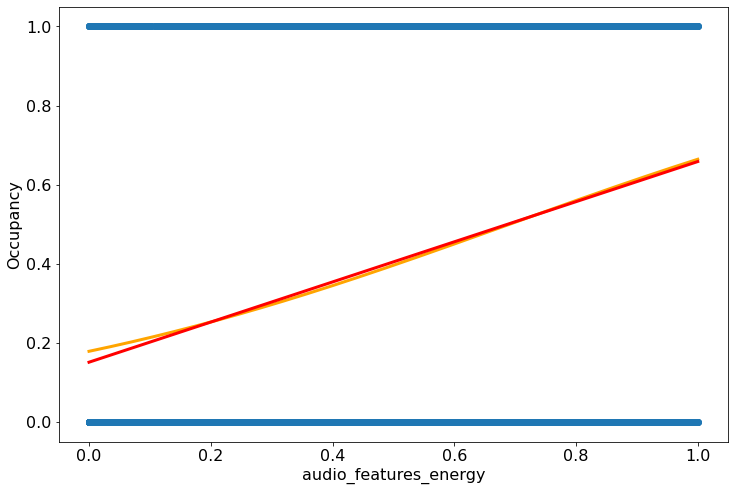

In [1263]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

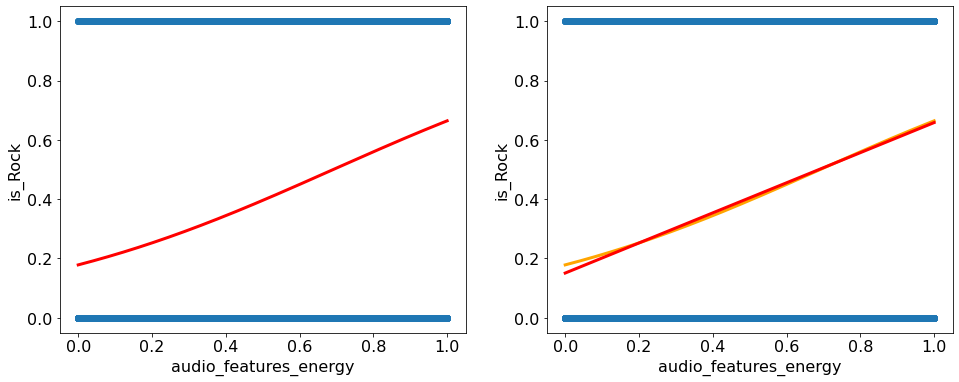

In [1264]:
fig,  axs = plt.subplots(1,2,figsize = (16,6))
plt.sca(axs[0])
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel(class_name, fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.sca(axs[1])
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel(class_name, fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [1269]:
print(clf.coef_)
print(clf.intercept_)

[[-3.21483735  2.3594278  -2.69040028 -0.01771004  1.06637216 -0.73441758
   0.22673383]]
[0.51019947]


In [116]:
x = 1

In [118]:
print('Log-odds of passing exam', clf.coef_[0][0] * x + clf.intercept_[0])
print('Odds of passing exam', np.e**(clf.coef_[0][0] * x + clf.intercept_[0]))

Log-odds of passing exam -1.9909202424586012
Odds of passing exam 0.13656969037338149


In [1172]:
def proba(x, beta0, beta1):
    return 1/(1+np.e**(-(beta1 * x + beta0)))

In [1173]:
proba(0.5, clf.intercept_[0], clf.coef_[0][0])

0.3958963834323212

### Rule-based

In [1270]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [1273]:
import wittgenstein as lw   

In [1274]:
ripper_clf = lw.RIPPER()

In [1275]:
ripper_clf.fit(X_train, y_train)

In [1276]:
ripper_clf

<RIPPER(k=2, max_rules=None, prune_size=0.33, n_discretize_bins=10, random_state=None, max_rule_conds=None, dl_allowance=64, verbosity=0, max_total_conds=None)>

In [1277]:
ripper_clf.ruleset_

<Ruleset [5=0.0^4=1.0^3=8.0-10.0^6=0.0] V [5=0.0^4=1.0^0=0.23-0.31^1=0.82-0.91] V [5=0.0^4=1.0] V [5=0.0^0=0.23-0.31^1=0.82-0.91] V [5=0.0^0=0.05-0.23^1=0.73-0.82] V [5=0.0^0=0.23-0.31^1=0.91-1.0] V [5=0.0^0=0.37-0.43^3=6.0-8.0] V [5=0.0^0=0.05-0.23^1=0.91-1.0] V [5=0.0^0=0.31-0.37^1=0.91-1.0] V [5=0.0^2=0.02-0.03^6=1.0^3=10.0-12.0] V [5=0.0^2=0.02-0.03^0=0.37-0.43] V [5=0.0^3=8.0-10.0^6=1.0^1=0.65-0.73] V [5=0.0^0=0.31-0.37^1=0.82-0.91^6=1.0] V [5=0.0^3=8.0-10.0^6=1.0] V [5=0.0^2=0.03-0.04^3=15.0-22.0] V [5=0.0^0=0.37-0.43^1=0.82-0.91^6=1.0] V [5=0.0^2=0.02-0.03^6=1.0^1=0.65-0.73] V [5=0.0^2=0.02-0.03^0=0.43-0.48^1=0.55-0.65] V [5=0.0^0=0.05-0.23^1=0.55-0.65] V [5=0.0^0=0.23-0.31^1=0.55-0.65] V [5=0.0^0=0.37-0.43^3=15.0-22.0]>

In [1278]:
ripper_clf.score(X_test, y_test)

0.6580459770114943

In [1279]:
ripper_clf.fit(X_train, y_train, feature_names=attributes)

In [1280]:
ripper_clf.ruleset_

<Ruleset [artist_solo=0.0^album_type=RadioProgram=1.0^album_tracks=8.0-10.0^album_producer=0.0] V [artist_solo=0.0^album_type=RadioProgram=1.0^audio_features_energy=0.73-0.82^album_tracks=6.0-8.0^album_producer=0.0] V [artist_solo=0.0^album_type=RadioProgram=1.0^audio_features_energy=0.91-1.0] V [artist_solo=0.0^album_type=RadioProgram=1.0^audio_features_energy=0.82-0.91^audio_features_danceability=0.23-0.31] V [artist_solo=0.0^album_type=RadioProgram=1.0^album_tracks=6.0-8.0] V [artist_solo=0.0^album_type=RadioProgram=1.0^album_tracks=8.0-10.0^audio_features_danceability=0.05-0.23] V [artist_solo=0.0^audio_features_danceability=0.23-0.31^audio_features_energy=0.82-0.91] V [artist_solo=0.0^album_type=RadioProgram=1.0^audio_features_energy=0.82-0.91] V [artist_solo=0.0^album_type=RadioProgram=1.0^audio_features_energy=0.55-0.65] V [artist_solo=0.0^album_producer=1.0^album_tracks=8.0-10.0^album_type=RadioProgram=0.0] V [artist_solo=0.0^audio_features_danceability=0.31-0.37^audio_features

### Support Vector Machine

In [1332]:
from sklearn.decomposition import PCA

In [1342]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [1343]:
attributes

['audio_features_danceability',
 'audio_features_energy',
 'audio_features_speechiness',
 'album_tracks',
 'album_type=Radio Program',
 'artist_solo',
 'album_producer']

In [1344]:
clf = LinearSVC(C=0.10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7442528735632183
F1-score [0.78667306 0.68077475]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2002
           1       0.72      0.64      0.68      1478

    accuracy                           0.74      3480
   macro avg       0.74      0.73      0.73      3480
weighted avg       0.74      0.74      0.74      3480



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [1330]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [1333]:
pca = PCA()

In [1336]:
support_vectors_pca = pca.fit_transform(support_vectors)

In [1337]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

NameError: name 'X_pca' is not defined

#### Effect of C

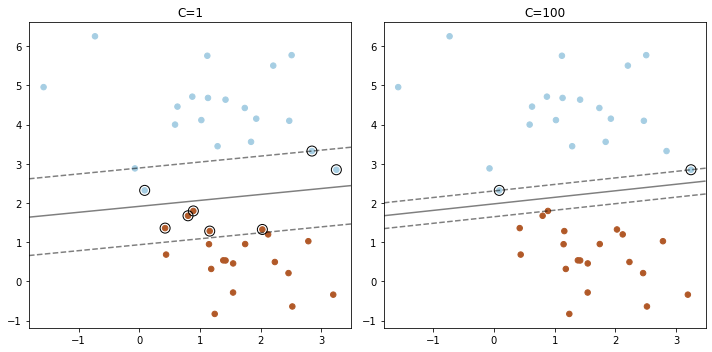

In [1338]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

##### Nonlinear SVM

In [1319]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [1345]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [1359]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
#plot_confusion_matrix(clf, X_test,y_test)

Accuracy 0.7721264367816092
F1-score [0.81204077 0.71068953]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2002
           1       0.77      0.66      0.71      1478

    accuracy                           0.77      3480
   macro avg       0.77      0.76      0.76      3480
weighted avg       0.77      0.77      0.77      3480



array([[1713,  289],
       [ 504,  974]])

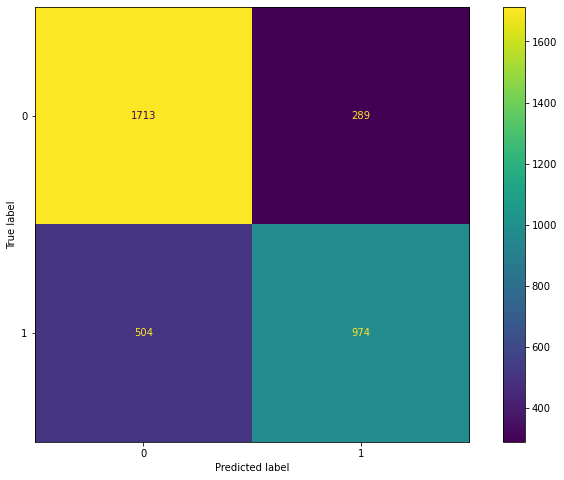

In [1360]:
plot_confusion_matrix(clf, X_test,y_test)

In [1361]:
clf = SVC(gamma='scale', C=20, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7804597701149425
F1-score [0.81678657 0.72616487]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2002
           1       0.77      0.69      0.73      1478

    accuracy                           0.78      3480
   macro avg       0.78      0.77      0.77      3480
weighted avg       0.78      0.78      0.78      3480



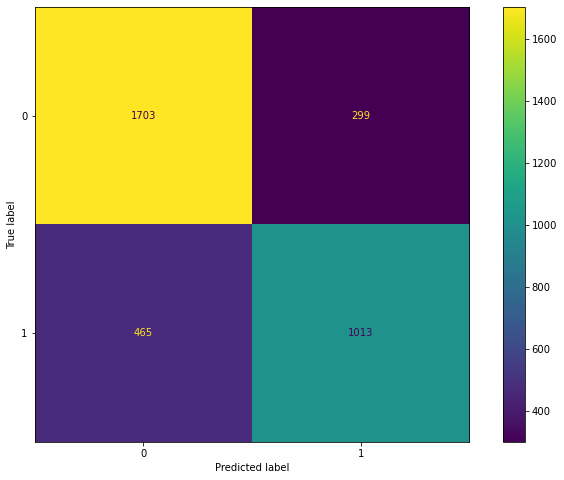

In [1362]:
plot_confusion_matrix(clf, X_test,y_test)

In [ ]:
#-> no need 
%%time
#GridSearchCV
param_list_0 = {'max_depth': [None, 5, 10],
              'min_samples_split': [round((len(X)*0.01)), 2*round((len(X)*0.01))],
              'min_samples_leaf': [round((len(X)*0.01)), 2*round((len(X)*0.01))]}
grid_search = GridSearchCV(clf, param_grid=param_list_0, n_jobs=3, pre_dispatch='3*n_jobs')
grid_search.fit(X, y)
grid_search.best_estimator_

In [1323]:
clf.support_

array([   5,    8,   11, ..., 8108, 8115, 8116], dtype=int32)

In [1324]:
clf.support_vectors_[:10]

array([[-0.5686343 , -1.83444853, -0.47819696,  0.08714215,  2.29254839,
        -0.98873341, -0.55952299],
       [ 0.17942301, -0.74596725, -0.43726931, -0.74401793,  2.29254839,
        -0.98873341,  1.78723666],
       [-0.10765736,  0.47515632, -0.09421361,  0.27184439, -0.43619581,
         1.01139497, -0.55952299],
       [ 0.81838419,  0.78866625, -0.16156147,  0.91830223, -0.43619581,
        -0.98873341, -0.55952299],
       [ 0.07500848, -1.31405926, -0.41753949,  0.17949327, -0.43619581,
        -0.98873341, -0.55952299],
       [ 0.852782  ,  0.95283226,  0.73256962,  2.5806224 , -0.43619581,
        -0.98873341, -0.55952299],
       [-1.2966839 , -1.51072269, -0.40620574, -0.28226233, -0.43619581,
        -0.98873341, -0.55952299],
       [ 0.33378488,  1.50195543, -0.35287618, -0.18991121, -0.43619581,
         1.01139497, -0.55952299],
       [-0.02982723,  0.62347414,  0.39218611,  0.73359999, -0.43619581,
        -0.98873341,  1.78723666],
       [ 0.37793765,  0.7163

In [1355]:
clf.n_support_, len(X_train)

(array([2056, 2000], dtype=int32), 8120)

### Neural Network

In [115]:
df

audio_features_danceability  audio_features_energy  \
0                         0.675894               0.634476   
1                         0.528643               0.817461   
2                         0.745566               0.701470   
3                         0.658179               0.924525   
4                         0.513238               0.560410   
...                            ...                    ...   
12882                     0.790364               0.719288   
12883                     0.843077               0.536496   
12884                     0.609686               0.895136   
12885                     0.574426               0.548327   
12886                     0.499339               0.050622   

       audio_features_speechiness  album_tracks  album_type=Radio Program  \
0                        0.159310             7                         0   
1                        0.461818             7                         0   
2                        0.124595             7                         0   
3                        0.032985             2                         0   
4                        0.525519             7                         0   
...                           ...           ...                       ...   
12882                    0.082550            14                         0   
12883                    0.074001            14                         0   
12884                    0.051517            14                         0   
12885                    0.033388            14                         0   
12886                    0.065189             1                         0   

       artist_solo  album_producer  is_Rock  
0                0               0        0  
1                0               0        0  
2                0               0        0  
3                0               0        0  
4                0               0        0  
...            ...             ...      ...  
12882            1               1        0  
12883            1               1        0  
12884            1               1        0  
12885            1               1        0  
12886            1               0        0  

[11600 rows x 8 columns]

In [109]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [110]:
# standardize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
from sklearn.neural_network import MLPClassifier

In [112]:
clf = MLPClassifier(random_state=0)
#induction
clf.fit(X_train, y_train)
#deduction
y_pred_train  = clf.predict(X_train)
y_pred = clf.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [113]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.771264367816092
F1-score [0.80537897 0.72264808]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2002
           1       0.74      0.70      0.72      1478

    accuracy                           0.77      3480
   macro avg       0.77      0.76      0.76      3480
weighted avg       0.77      0.77      0.77      3480



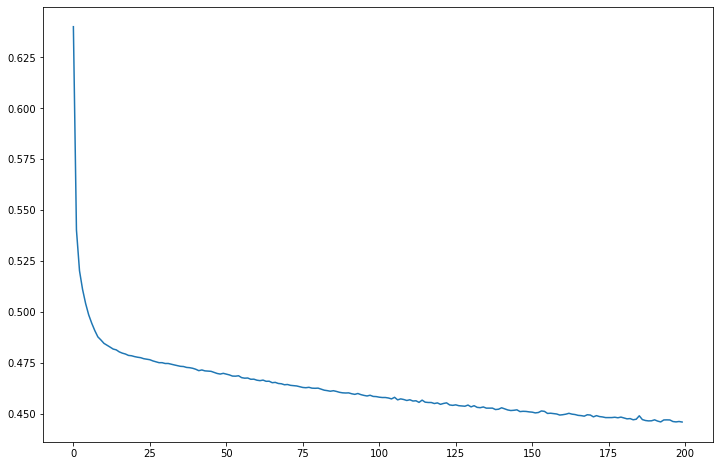

In [1369]:
plt.plot(clf.loss_curve_)
plt.show()

In [124]:
clf = MLPClassifier(hidden_layer_sizes=(1000, 1000), max_iter = 50, random_state=0, early_stopping=False, verbose = True)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Iteration 1, loss = 0.51214676
Iteration 2, loss = 0.48784802
Iteration 3, loss = 0.48126129
Iteration 4, loss = 0.47923574
Iteration 5, loss = 0.47733646
Iteration 6, loss = 0.47397013
Iteration 7, loss = 0.46935535
Iteration 8, loss = 0.46546640


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy 0.7686781609195402
F1-score [0.80607083 0.71342115]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2002
           1       0.75      0.68      0.71      1478

    accuracy                           0.77      3480
   macro avg       0.77      0.76      0.76      3480
weighted avg       0.77      0.77      0.77      3480



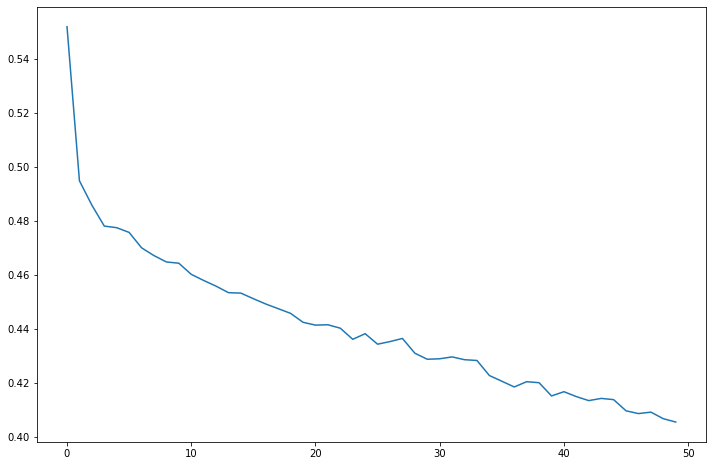

In [122]:
plt.plot(clf.loss_curve_)
plt.show()

In [116]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7775862068965518
F1-score [0.81447747 0.72238164]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2002
           1       0.77      0.68      0.72      1478

    accuracy                           0.78      3480
   macro avg       0.78      0.76      0.77      3480
weighted avg       0.78      0.78      0.78      3480



In [126]:
from keras.models import Sequential
from keras.layers import Dense

In [127]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [128]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=10).history

Epoch 1/50
812/812 [==============================] - 4s 3ms/step - loss: 0.5382 - accuracy: 0.7312
Epoch 2/50
812/812 [==============================] - 3s 4ms/step - loss: 0.4786 - accuracy: 0.7758
Epoch 3/50
812/812 [==============================] - ETA: 0s - loss: 0.4811 - accuracy: 0.7655 ETA: 0s - loss: 0.4811  - ETA: 0s - loss: 0.4811 - accuracy: 0.76 - 3s 3ms/step - loss: 0.4811 - accuracy: 0.7655
Epoch 4/50
812/812 [==============================] - 3s 3ms/step - loss: 0.4925 - accuracy: 0.7668
Epoch 5/50
812/812 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.7736 ETA: 0s - loss: 0.4 - 3s 3ms/step - loss: 0.4728 - accuracy: 0.7736
Epoch 6/50
812/812 [==============================] - 3s 3ms/step - loss: 0.4682 - accuracy: 0.7783
Epoch 7/50
812/812 [==============================] - 3s 3ms/step - loss: 0.4755 - accuracy: 0.7716
Epoch 8/50
812/812 [==============================] - 3s 3ms/step - loss: 0.4694 - accuracy: 0.7737
Epoch 9/50
812/812 [======

In [129]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=50).history

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.5533 - accuracy: 0.7196
Epoch 2/50
163/163 [==============================] - 1s 5ms/step - loss: 0.4909 - accuracy: 0.7610
Epoch 3/50
163/163 [==============================] - 1s 4ms/step - loss: 0.4888 - accuracy: 0.7630
Epoch 4/50
163/163 [==============================] - 1s 4ms/step - loss: 0.4825 - accuracy: 0.7695
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.4714 - accuracy: 0.7697
Epoch 6/50
163/163 [==============================] - 1s 4ms/step - loss: 0.4670 - accuracy: 0.7772
Epoch 7/50
163/163 [==============================] - 1s 4ms/step - loss: 0.4732 - accuracy: 0.7730
Epoch 8/50
163/163 [==============================] - 1s 4ms/step - loss: 0.4797 - accuracy: 0.7673
Epoch 9/50
163/163 [==============================] - 1s 4ms/step - loss: 0.4651 - accuracy: 0.7789
Epoch 10/50
163/163 [==============================] - 1s 4ms/step - loss: 0.4636 - accuracy: 0.7777

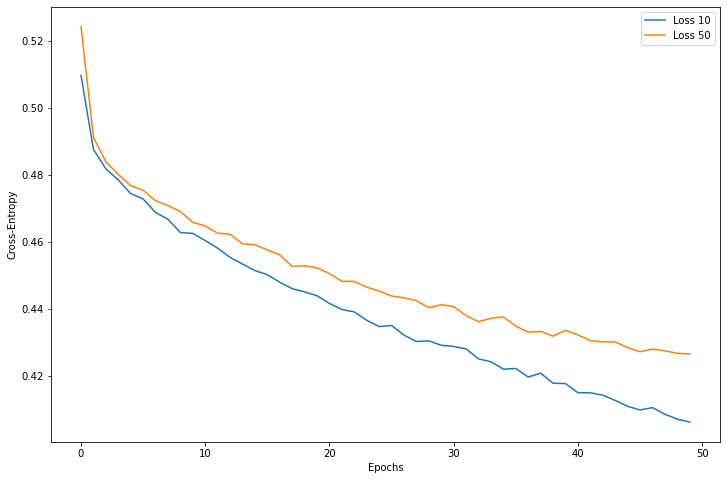

In [130]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [131]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

109/109 [==============================] - 1s 4ms/step - loss: 0.4759 - accuracy: 0.7744
Loss 0.482537, Accuracy 0.773563
Loss 0.475855, Accuracy 0.774425


In [132]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.575287356321839
F1-score [0.73039037 0.        ]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      2002
           1       0.00      0.00      0.00      1478

    accuracy                           0.58      3480
   macro avg       0.29      0.50      0.37      3480
weighted avg       0.33      0.58      0.42      3480



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Ensemble classifiers

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7916666666666666
F1-score [0.82475224 0.74318101]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2002
           1       0.78      0.71      0.74      1478

    accuracy                           0.79      3480
   macro avg       0.79      0.78      0.78      3480
weighted avg       0.79      0.79      0.79      3480



In [136]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.7990632318501171,
  'recall': 0.8521478521478522,
  'f1-score': 0.8247522359197486,
  'support': 2002},
 '1': {'precision': 0.7799256505576209,
  'recall': 0.709742895805142,
  'f1-score': 0.7431810131066242,
  'support': 1478},
 'accuracy': 0.7916666666666666,
 'macro avg': {'precision': 0.7894944412038689,
  'recall': 0.7809453739764971,
  'f1-score': 0.7839666245131864,
  'support': 3480},
 'weighted avg': {'precision': 0.7909352591057752,
  'recall': 0.7916666666666666,
  'f1-score': 0.7901079062307264,
  'support': 3480}}

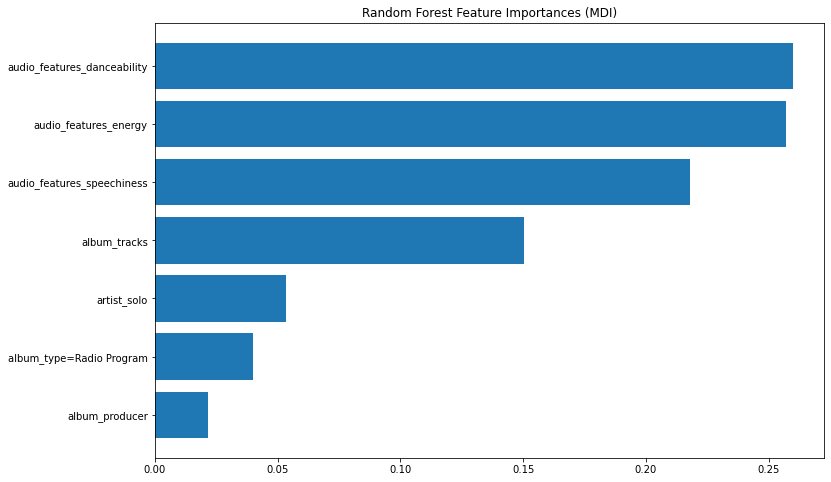

In [137]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [138]:
from sklearn.inspection import permutation_importance

In [139]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

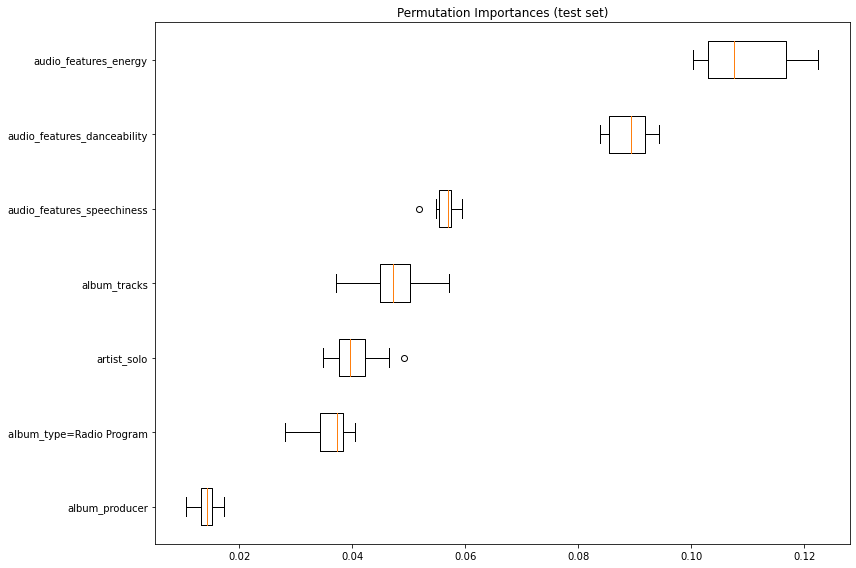

In [140]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(attributes)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [141]:
import pydotplus
from sklearn import tree
from IPython.display import Image

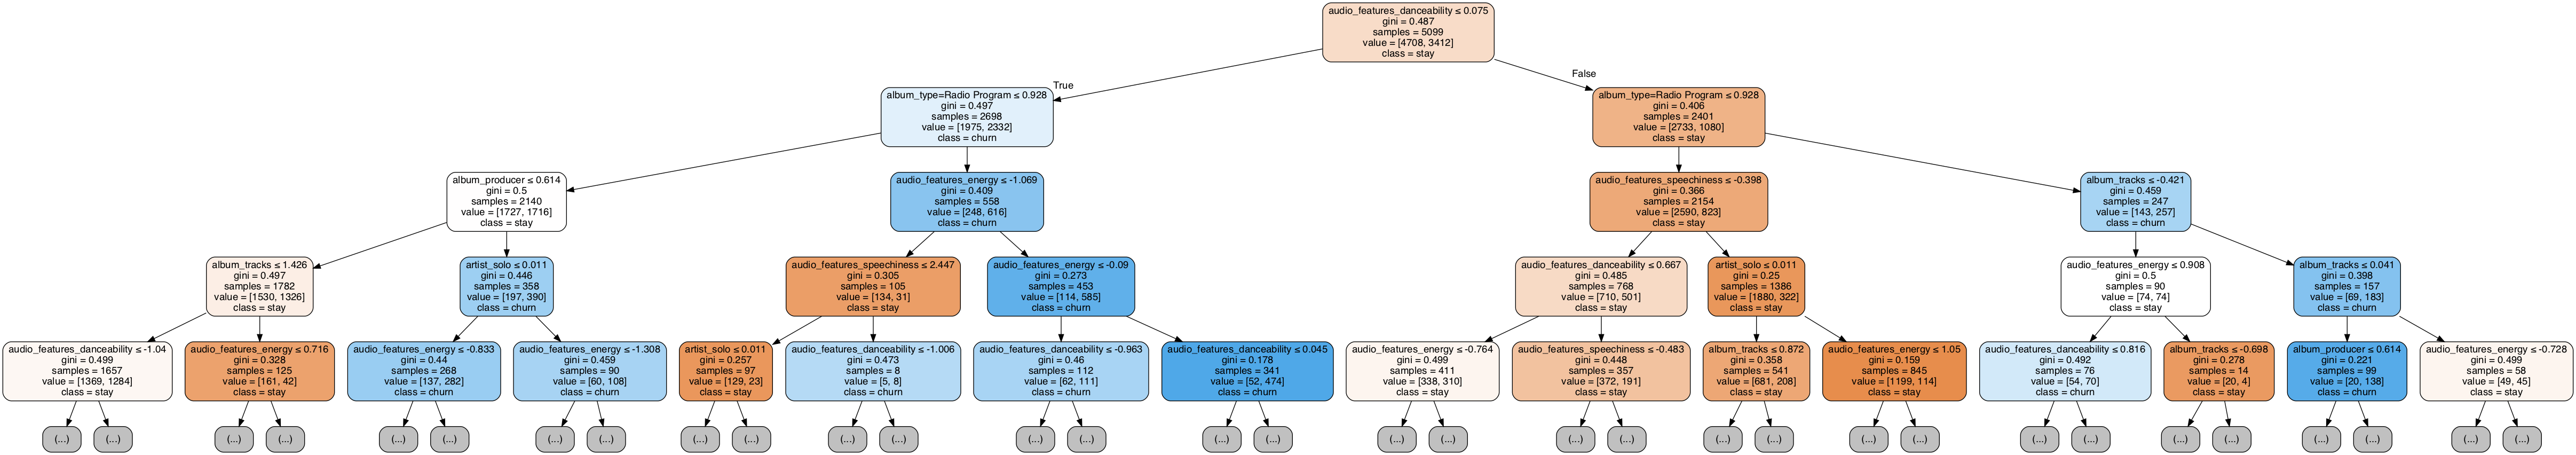

In [142]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

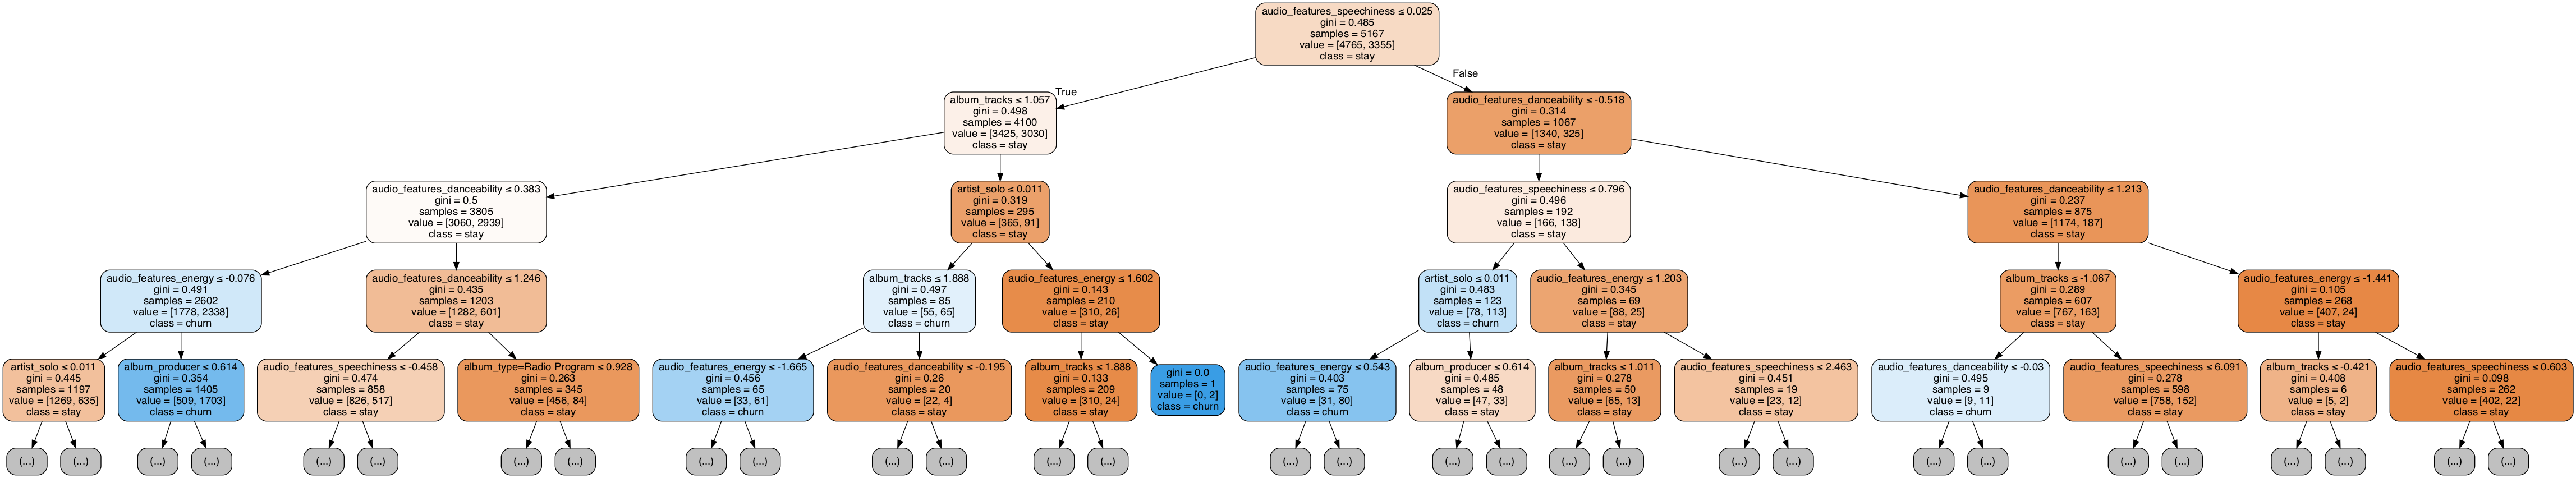

In [143]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=attributes, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [144]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7896551724137931
F1-score [0.82172431 0.74351787]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2002
           1       0.77      0.72      0.74      1478

    accuracy                           0.79      3480
   macro avg       0.79      0.78      0.78      3480
weighted avg       0.79      0.79      0.79      3480



In [145]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7916666666666666
F1-score [0.82475224 0.74318101]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2002
           1       0.78      0.71      0.74      1478

    accuracy                           0.79      3480
   macro avg       0.79      0.78      0.78      3480
weighted avg       0.79      0.79      0.79      3480



In [146]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7560344827586207
F1-score [0.80269579 0.68046669]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2002
           1       0.77      0.61      0.68      1478

    accuracy                           0.76      3480
   macro avg       0.76      0.74      0.74      3480
weighted avg       0.76      0.76      0.75      3480



### Cross Validation

In [147]:
from sklearn.model_selection import cross_val_score

In [148]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.741 +/- 0.037


### Tuning the hyper-parameters

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [150]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7899425287356322
F1-score [0.82235723 0.743058  ]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2002
           1       0.77      0.72      0.74      1478

    accuracy                           0.79      3480
   macro avg       0.79      0.78      0.78      3480
weighted avg       0.79      0.79      0.79      3480



In [151]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7859195402298851
F1-score [0.82009177 0.73572189]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2002
           1       0.77      0.70      0.74      1478

    accuracy                           0.79      3480
   macro avg       0.78      0.77      0.78      3480
weighted avg       0.79      0.79      0.78      3480



In [152]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 20, 'min_samples_leaf': 30, 'max_depth': 10}